Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset already split.
Class mapping: {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}
Class mapping: {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}
Class Weights: {0: np.float64(1.3227323008849559), 1: np.float64(0.7417803970223326), 2: np.float64(1.0619449378330372), 3: np.float64(0.9849670510708401), 4: np.float64(1.1541988416988418), 5: np.float64(1.0099239864864864), 6: np.float64(0.8792279411764706), 7: np.float64(1.0581858407079645)}


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 96, 103, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │        10,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,064,939 (15.51 MB)

 Trainable params: 4,020,356 (15.34 MB)

 Non-trainable params: 44,583 (174.16 KB)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.5399 - loss: 1.5218
Epoch 1: val_accuracy improved from -inf to 0.50333, saving model to /content/drive/My Drive/saved_models/new_model.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 125s 340ms/step - accuracy: 0.5407 - loss: 1.5191 - val_accuracy: 0.5033 - val_loss: 2.0702 - learning_rate: 0.0010
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7775 - loss: 0.6364
Epoch 2: val_accuracy did not improve from 0.50333
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 43ms/step - accuracy: 0.7776 - loss: 0.6362 - val_accuracy: 0.1675 - val_loss: 2.4916 - learning_rate: 0.0010
Epoch 3/50
149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8224 - loss: 0.4885
Epoch 3: val_accuracy did not improve from 0.50333
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8226 - loss: 0.4880 - val_accuracy: 0.2867 - val_loss: 2.3259 - learning_rate: 0.0010
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8773 - loss: 0.36

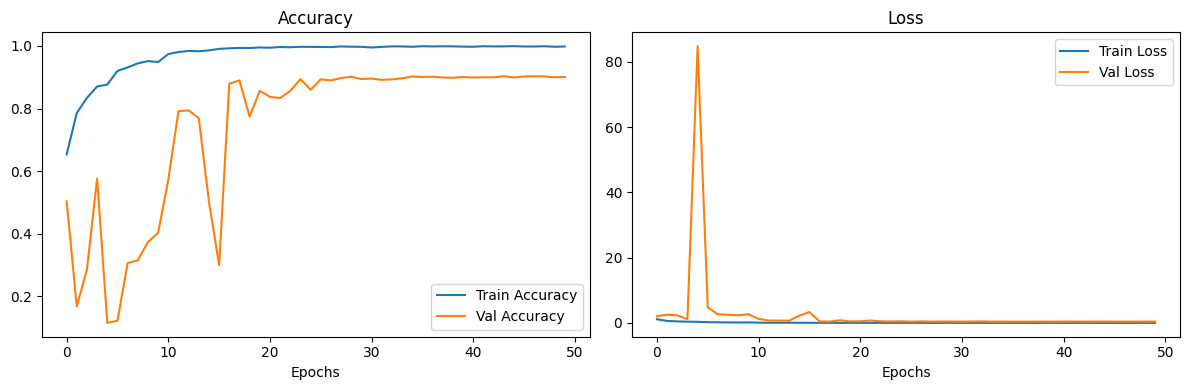

38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       113
           1       0.88      0.89      0.88       202
           2       0.93      0.88      0.91       141
           3       0.87      0.87      0.87       152
           4       0.89      0.89      0.89       130
           5       0.94      0.92      0.93       149
           6       0.92      0.89      0.90       171
           7       0.82      0.92      0.87       142

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



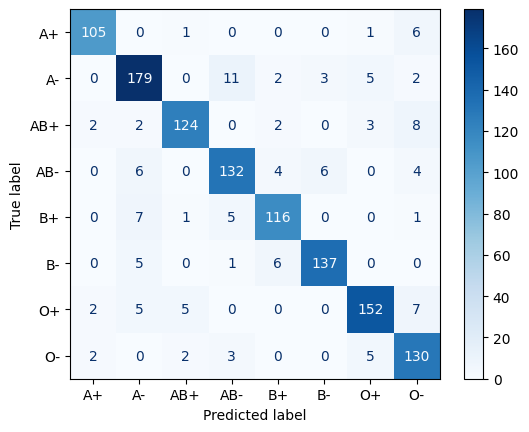

In [ ]:
#  Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

# === Imports ===
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

# === Paths ===
dataset_path = "/content/drive/My Drive/dataset_blood_group"
train_path = "/content/train_dataset"
test_path = "/content/test_dataset"
model_save_path = "/content/drive/My Drive/saved_models/new_model.keras"
os.makedirs("/content/drive/My Drive/saved_models", exist_ok=True)

# === Split Dataset (Only run ONCE or delete folders before re-running) ===
if not os.path.exists(train_path) or not os.path.exists(test_path):
    print("Splitting dataset into train/test...")

    categories = os.listdir(dataset_path)
    train_ratio = 0.8

    for category in categories:
        os.makedirs(os.path.join(train_path, category), exist_ok=True)
        os.makedirs(os.path.join(test_path, category), exist_ok=True)

        images = os.listdir(os.path.join(dataset_path, category))
        random.shuffle(images)
        train_size = int(len(images) * train_ratio)
        train_images = images[:train_size]
        test_images = images[train_size:]

        for img in train_images:
            shutil.copy(os.path.join(dataset_path, category, img), os.path.join(train_path, category, img))
        for img in test_images:
            shutil.copy(os.path.join(dataset_path, category, img), os.path.join(test_path, category, img))

    print("✅ Dataset split complete.")
else:
    print("✅ Dataset already split.")

# === Preprocessing ===
def preprocess_image(image_path, target_size=(96, 103)):
    img = load_img(image_path, target_size=target_size, color_mode="grayscale")
    img_array = img_to_array(img) / 255.0
    img_array = np.repeat(img_array, 3, axis=-1)  # Make it RGB for EfficientNet
    return img_array

def load_data_from_directory(directory, target_size=(96, 103)):
    X, y = [], []
    class_labels = sorted(os.listdir(directory))
    label_map = {label: idx for idx, label in enumerate(class_labels)}
    print(f"Class mapping: {label_map}")

    for label in class_labels:
        label_path = os.path.join(directory, label)
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            try:
                X.append(preprocess_image(img_path, target_size))
                y.append(label_map[label])
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(X), np.array(y), label_map

# === Load Data ===
X_train, y_train, train_label_map = load_data_from_directory(train_path)
X_test, y_test, test_label_map = load_data_from_directory(test_path)
num_classes = len(set(y_train))

# === Compute Class Weights ===
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}
print("Class Weights:", class_weights_dict)

# === Model Architecture ===
input_shape = (96, 103, 3)

def lr_schedule(epoch):
    initial_lr = 1e-3
    drop = 0.5
    epochs_drop = 5
    return initial_lr * (drop ** (epoch // epochs_drop))

def build_model(num_classes):
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = True

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)  # ✅ Added
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

# === Train Model ===
def build_and_train_model(X_train, y_train, X_test, y_test, num_classes):
    model = build_model(num_classes)

    callbacks = [
        LearningRateScheduler(lr_schedule),
        EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True),
        ModelCheckpoint(model_save_path, monitor="val_accuracy", save_best_only=True, verbose=1)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,  # ✅ 50 Epochs
        batch_size=32,
        callbacks=callbacks,
        class_weight=class_weights_dict  # ✅ Class weights
    )

    model.evaluate(X_test, y_test, verbose=1)
    return model, history

model, history = build_and_train_model(X_train, y_train, X_test, y_test, num_classes)

# === Plotting ===
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_curves(history)

# === Evaluation ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
ConfusionMatrixDisplay(conf_matrix, display_labels=test_label_map.keys()).plot(cmap="Blues")
plt.show()
